# Notebook 2_2

## Phase Shift

#### Student Learning Outcomes
* Learn the concept of phase shift in sine signals.
* Learn how to identify the phase shift from graph.
--------------------

In [1]:
# import at first
import numpy as np
import matplotlib.pyplot as plt


<div style="border-left: 4px solid #28a745; padding: 10px; background-color: #f9fff3; margin-top: 10px;">
  <h2 style="margin: 0;">Task 1: Sine Signal as Circular Motion</h2>
</div>


Recall the last class, sine signal is written as:

$$A \sin(\omega t+\phi)$$

or

$$A \sin(2\pi ft+\phi)$$

The $\phi$ is something called **Phase Shift**. 

So, what is this?

If you have a sine signal, going for a full cycle corresponds to one complete revolution around a circle.

And one complete revolution around a circle is **360 deg or 2$\pi$ radians**.

So, for each specific time $t$, 
$$\omega t + \phi$$ 
actually represents an angle on the unit circle, measured in radians. 

----------------

The next code cell gives you an animation of this based on a sine signal: $\sin(\omega t+\phi)$.

**Run the code** to see what happens. 
Try change these:

* ```omega = 1```, this is the frequency (rad/s).
* ```phi = -np.pi/4```, this is the phase shift value, default set to $-\pi/4$ rad = -45 deg.

The Y-axes of two figures are exaxtly aligned.

The Time-axis of the right figure is fixed. So it always runs for the same time duration.

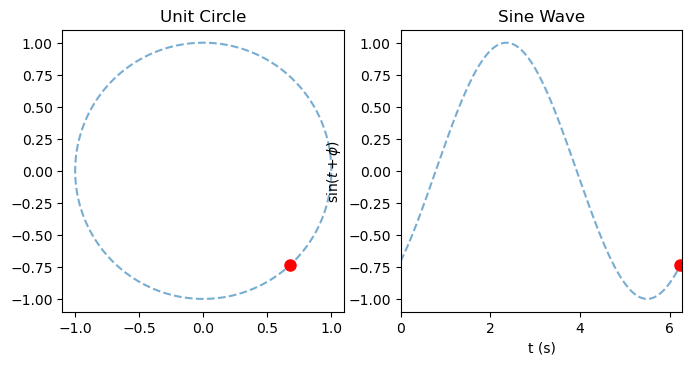

In [2]:
from matplotlib.animation import FuncAnimation
from IPython.display import display, HTML
# 1) Animation and Plot Settings

fps = 30           # frames per second
duration = 5       # total duration (seconds)
frames = fps * duration

omega = 1      # omega freq, you can change this
phi = -np.pi/4            # phase shift, you can change this
t_max = 2 * np.pi  # animate from t=0 to t=2π

# 2) Create Figure/Subplots

fig, (ax_left, ax_right) = plt.subplots(1, 2, figsize=(8, 4))

# Left: Unit circle
ax_left.set_aspect('equal', 'box')
ax_left.set_xlim(-1.1, 1.1)
ax_left.set_ylim(-1.1, 1.1)
ax_left.set_title("Unit Circle")

# Right: Sine wave
ax_right.set_xlim(0, t_max)
ax_right.set_ylim(-1.1, 1.1)
ax_right.set_xlabel("t (s)")
ax_right.set_ylabel(r"$\sin(t + \phi)$")
ax_right.set_title("Sine Wave")

# 3) Draw Static Circle & Sine Wave

theta = np.linspace(0, 2*np.pi, 200)
ax_left.plot(np.cos(theta), np.sin(theta), '--', alpha=0.6)

# Full sine wave
t_vals = np.linspace(0, t_max, 400)
ax_right.plot(t_vals, np.sin(omega*t_vals + phi), '--', alpha=0.6)

# 4) Create the "moving" points (one on circle, one on wave)
circle_dot, = ax_left.plot([], [], 'ro', ms=8)  # red dot on circle
wave_dot,   = ax_right.plot([], [], 'ro', ms=8) # red dot on sine wave
ax_left.set_box_aspect(1)
ax_right.set_box_aspect(1)
# 5) init() for FuncAnimation

def init():
    circle_dot.set_data([], [])
    wave_dot.set_data([], [])
    return circle_dot, wave_dot

# 6) update() per frame

def update(frame):
    t = (frame / frames) * t_max
    
    x_c = np.cos(omega*t + phi)
    y_c = np.sin(omega*t + phi)
    circle_dot.set_data([x_c], [y_c])
    
    # Wave dot: at x = t, y = sin(t + phi)
    x_w = t
    y_w = np.sin(omega*t + phi)
    wave_dot.set_data([x_w], [y_w])
    
    return circle_dot, wave_dot

# 7) Create and display the animation
anim = FuncAnimation(
    fig, 
    update, 
    frames=frames, 
    init_func=init, 
    blit=True, 
    interval=1000/fps
)
HTML(anim.to_jshtml())

-------
In the markdown cell, **indicate your observations**.

* When you at $\omega = 1$ rad/s, how many seconds does it take to move one complete revolution?
* When you at $\omega = 2$ rad/s, how many seconds does it take to move one complete revolution?
* How does $\omega$ affect the movement of the red on circle?

-------
In the markdown cell, **indicate your observations**.

* When you at $\phi = -\pi/4$ rad, where is the red dot located on the circle at $t = 0$ sec?
* When you at $\phi = 0$ rad, where is the red dot located on the circle at $t = 0$ sec?
* When you at $\phi = \pi/2$ rad, where is the red dot located on the circle at $t = 0$ sec?
* How does $\phi$ affect the position of the red on circle on the left figure?
* How does $\phi$ affect the position of the sine signal on the right figure?

<span style="border-left: 4px solid #FFA500; padding: 5px; background-color: #FFF4E5; display: inline-block;">
    <strong>Two observations: 1 pt + 2 pt</strong>
</span>

<div style="border-left: 4px solid #28a745; padding: 10px; background-color: #f9fff3; margin-top: 10px;">
  <h2 style="margin: 0;">Task 2: Phase Shift in Sine Plot</h2>
</div>


The next code cell shows a figure, including 
* one base sine, $\sin(\omega t)$
* one phase-shifted sine, $\sin(\omega t+\phi)$

In [3]:
%matplotlib inline 
## disable the Task 1 interactive GUI

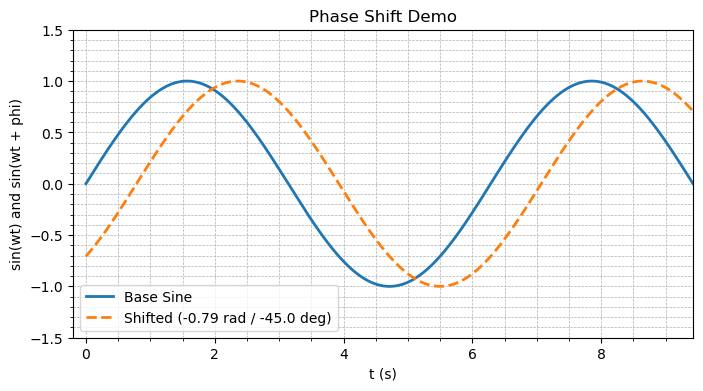

In [4]:
phase_shift_rad = -np.pi/4  # phase shift, you can change this
phase_shift_deg = np.rad2deg(phase_shift_rad)

t_2 = np.linspace(0, 3 * np.pi, 1000)

omega_2 = 1
original_sin = np.sin(omega_2*t_2)
shifted_sin = np.sin(omega_2*t_2 + phase_shift_rad)  # Apply phase shift
plt.figure(figsize=(8, 4))
plt.plot(t_2, original_sin, label='Base Sine', lw=2)
plt.plot(t_2, shifted_sin, label=f'Shifted ({round(phase_shift_rad, 2)} rad / {round(phase_shift_deg, 1)} deg)', lw=2, linestyle='dashed')
plt.ylim(-1.5, 1.5)
plt.xlim(-0.2, 3 * np.pi)
plt.xlabel("t (s)")
plt.ylabel("sin(wt) and sin(wt + phi)")
plt.title("Phase Shift Demo")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.minorticks_on()
plt.legend()
plt.show()

In the previous code, ```phase_shift_rad = -np.pi/4``` sets the phase shift from the base sine signal.

You can see the Blue one crosses Amplitude = 0 at t = 0 s, while the Orange on crosses Amplitude = 0 in delayed time.

Create a Markdown cell, 

* From the graph, estimate the delayed time, denoted as $\Delta t$ (s).
* From the equation, determine the period $T$ (s)
* Calculation the ratio $\frac{\Delta t}{T}$


**Answer:**

* $\Delta t$ (s) = 1.5 Grid * 0.5 s/Grid = 0.75 s
* $T$ (s) = 12.5 Grid * 0.5 s/Grid = 6.25 s
* $\frac{\Delta T}{T} = \frac{0.75}{6.25} = 0.12$

<span style="border-left: 4px solid #FFA500; padding: 5px; background-color: #FFF4E5; display: inline-block;">
    <strong>Markdown: 1 pt </strong>
</span>

You will notice your result is close to the ratio of $\frac{\pi/4}{2\pi} = 1/8 = 0.125$

-------

In fact, the relationship of delay time and phase shift is:

$$\frac{\phi \mathrm{ (rad)}}{2\pi \mathrm{ (rad)}} = \frac{-\Delta t \mathrm{ (s)}}{T \mathrm{ (s)}}$$

* If delayed ($\Delta t > 0$), phase shift $\phi$ is negative
* If ahead of time ($\Delta t < 0$), phase shift $\phi$ is positive.

<div style="border-left: 4px solid #28a745; padding: 10px; background-color: #f9fff3; margin-top: 10px;">
  <h2 style="margin: 0;">Task 3: Identify Phase Shift from Plot</h2>
</div>

With the conversion equation from delayed time to phase shift, we can **graphically identify** the phase shift between 2 sine waves. These two sines are in same freq. 

In practice, you won't have plot that have lots grids on it (like Task 2). Also, you won't have a base sine that crosses Amplitude 0 exact at Time 0.

So, we typically picked the most distinctive pattern of sine to check delay times: **Peak** 

------------
Let's try such problem setting:

* Your base signal is known as $1.5\sin(0.5t-0.6)$
* Your shift signal is in the same freq and Amplitude as the base signal, only shifted in the phase
* Their plots can be seen by running the next code

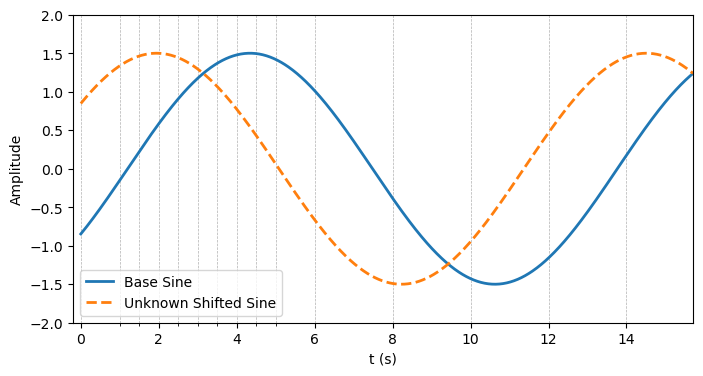

In [5]:
phase_1 = -0.6 
phase_2 = 0.6 # Assume you don't know it

t_3 = np.linspace(0, 5 * np.pi, 1000)

omega_3 = 0.5
original_sin = 1.5*np.sin(omega_3*t_3+phase_1)
shifted_sin = 1.5*np.sin(omega_3*t_3 + phase_2 ) 
plt.figure(figsize=(8, 4))
plt.plot(t_3, original_sin, label='Base Sine', lw=2)
plt.plot(t_3, shifted_sin, label='Unknown Shifted Sine', lw=2, linestyle='dashed')
plt.ylim(-2, 2)
plt.xlim(-0.2, 5 * np.pi)
plt.xlabel("t (s)")
plt.ylabel("Amplitude")
plt.grid(True, which='both',  axis='x',linestyle='--', linewidth=0.5)
plt.xticks([1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5], minor=True)
plt.legend()
plt.show()

Create a Markdown cell, 

* From the graph, estimate the delayed time by check their peaks.
* Calculate shifted phase
* Write down the math expression of the unknown shifted Sine.


**Answer:**

* $\Delta t$ (s) = 5 Grid * 0.5 s/Grid = 2.5 s
* $T$ (s) = 12 s
* $\text{Phase Shift} = 2\pi*\frac{2.5}{12}=0.375\pi=1.18$ rad
* Recall Base signal is $1.5\sin(0.5t-0.6)$
* So shifted signal is $1.5\sin(0.5t-0.6+1.18) = 1.5\sin(0.5t+0.58)$

<span style="border-left: 4px solid #FFA500; padding: 5px; background-color: #FFF4E5; display: inline-block;">
    <strong>Markdown: 1 pt </strong>
</span>

<div style="border-left: 4px solid #28a745; padding: 10px; background-color: #f9fff3; margin-top: 10px;">
  <h2 style="margin: 0;">Submit in .pdf</h2>
</div>


